In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

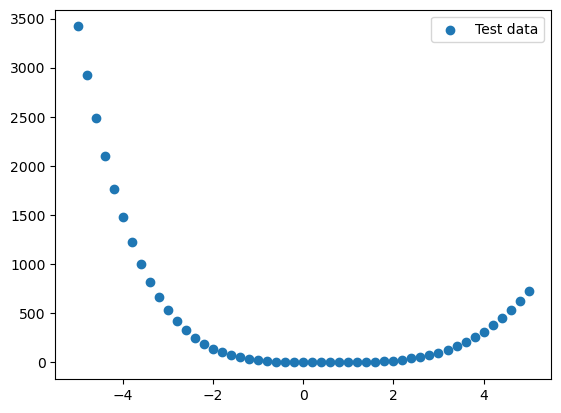

In [33]:
# Function to calculate y-values based on the polynomial equation
def polynomial(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

# Random parameters a-f
a_true, b_true, c_true, d_true, e_true, f_true = 2, -3, 1, 0, 5, -1

df = pd.read_csv("points.csv")
x_values = df["x"].values
y_values = df["y"].values

# Plot the dataset to visualize
plt.scatter(x_values, y_values, label="Test data")
plt.legend()
plt.show()

In [34]:
# Parameters of the genetic algorithm
population_size = 100  # Number of organisms
generations = 1000  # Number of generations
mutation_chance = 0.1  # Chance of mutation
selection_percentage = 0.2  # Percentage of the best organisms that are selected

In [35]:
# Initialize the population with random values between -10 and 10
def initialize_population(size):
    return [np.random.uniform(-10, 10, 6) for _ in range(size)]

population = initialize_population(population_size)

In [36]:
# Calculate the fitness of an organism
def fitness(organism, x_values, y_values):
    y_prediction = polynomial(x_values, *organism)
    return np.sum((y_values - y_prediction) ** 2)

# Calculate the fitness for the entire population
def calculate_fitness(population, x_values, y_values):
    return [fitness(organism, x_values, y_values) for organism in population]

In [37]:
# Select the best organisms
def select_best(population, fitness_scores, selection_percentage):
    num_best = int(len(population) * selection_percentage)
    best_indices = np.argsort(fitness_scores)[:num_best]
    return [population[i] for i in best_indices]

best_organisms = select_best(population, calculate_fitness(population, x_values, y_values), selection_percentage)

In [38]:
# Crossover of two organisms
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Create a new generation
def new_generation(best_organisms, population_size):
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(best_organisms, 2)
        child1, child2 = crossover(parent1, parent2)
        new_population.extend([child1, child2])
    return new_population[:population_size]

In [39]:
# Mutation function
def mutate(organism, mutation_chance):
    if random.random() < mutation_chance:
        gene_index = random.randint(0, len(organism) - 1)
        organism[gene_index] = random.uniform(-10, 10)
    return organism

# Apply mutation to the population
def apply_mutation(population, mutation_chance):
    return [mutate(organism, mutation_chance) for organism in population]

In [40]:
for generation in range(generations):
    fitness_scores = calculate_fitness(population, x_values, y_values)
    best_organisms = select_best(population, fitness_scores, selection_percentage)
    population = new_generation(best_organisms, population_size)
    population = apply_mutation(population, mutation_chance)
    
    # Print the best fitness score every 100 generations
    if generation % 100 == 0:
        best_fitness = min(fitness_scores)
        print(f"Generation {generation}: Best fitness = {best_fitness}")

# The best solution after the last generation
best_organism = select_best(population, calculate_fitness(population, x_values, y_values), 1)[0]
print("Best parameters found:", best_organism)

Generation 0: Best fitness = 7912047.1508887
Generation 100: Best fitness = 54088.914223016574
Generation 200: Best fitness = 43955.13248345753
Generation 300: Best fitness = 40782.368545724035
Generation 400: Best fitness = 40782.368545724035
Generation 500: Best fitness = 40782.368545724035
Generation 600: Best fitness = 40782.368545724035
Generation 700: Best fitness = 38695.28415191606
Generation 800: Best fitness = 38664.86775627523
Generation 900: Best fitness = 38664.86775627523
Best parameters found: [-0.32617682  3.25140505 -2.77887514  2.43968332 -9.99807954  9.3324846 ]


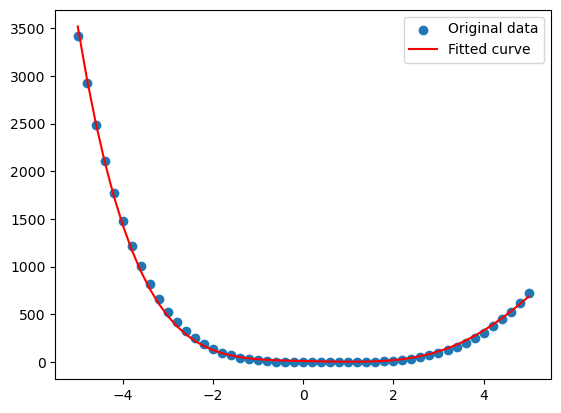

In [43]:
y_fit = polynomial(x_values, *best_organism)

# Plot the original and fitted curve
plt.scatter(x_values, y_values, label="Original data")
plt.plot(x_values, y_fit, label="Fitted curve", color='red')
plt.legend()
plt.show()
